In [1]:
import pandas as pd
import yfinance as yf

btc = pd.read_csv('data/btc_limpo.csv')

#deixa só a coluna Close
btc = btc[['Close']].dropna()

#converte para numérico
btc['Close'] = pd.to_numeric(btc['Close'], errors='coerce')
btc = btc.dropna()

#index em datetime
btc.index = pd.to_datetime(btc.index)

#split em treino/teste
train_size = int(len(btc) * 0.8)
train, test = btc['Close'].iloc[:train_size], btc['Close'].iloc[train_size:]


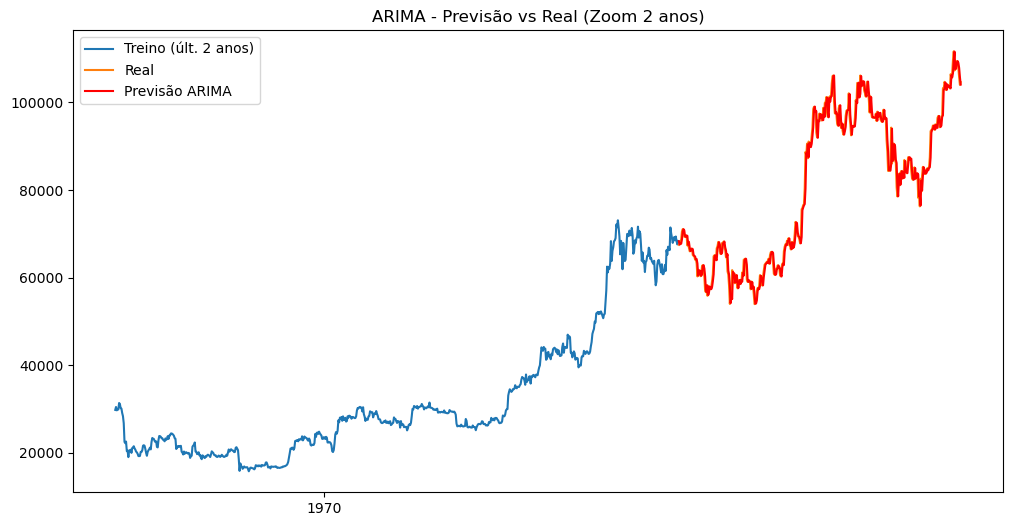

In [5]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

history = list(train.values)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])  # valor real entra no histórico

#converte Series para plot
pred_series = pd.Series(predictions, index=test.index)

#plot final
plt.figure(figsize=(12,6))
plt.plot(train.index[-730:], train[-730:], label="Treino (últ. 2 anos)")
plt.plot(test.index, test, label="Real")
plt.plot(pred_series.index, pred_series, label="Previsão ARIMA", color="red")
plt.legend()
plt.title("ARIMA - Previsão vs Real (Zoom 2 anos)")
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, pred_series))
mae = mean_absolute_error(test, pred_series)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 2081.283139800973
MAE: 1477.2708877562634
